PROBLEM STATEMENT: Classify plant village color diseases

By: Prem S Rajanampalle, REI Intercollege, Dayalbagh, Agra

The dataset link: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset

In [2]:
import os 

for dirpath, dirnames, filenames in os.walk("plantvillage dataset"):
    print(f" There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

 There are 3 directories and 0 images in plantvillage dataset
 There are 38 directories and 0 images in plantvillage dataset\color
 There are 0 directories and 630 images in plantvillage dataset\color\Apple___Apple_scab
 There are 0 directories and 621 images in plantvillage dataset\color\Apple___Black_rot
 There are 0 directories and 275 images in plantvillage dataset\color\Apple___Cedar_apple_rust
 There are 0 directories and 1645 images in plantvillage dataset\color\Apple___healthy
 There are 0 directories and 1502 images in plantvillage dataset\color\Blueberry___healthy
 There are 0 directories and 854 images in plantvillage dataset\color\Cherry_(including_sour)___healthy
 There are 0 directories and 1052 images in plantvillage dataset\color\Cherry_(including_sour)___Powdery_mildew
 There are 0 directories and 513 images in plantvillage dataset\color\Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
 There are 0 directories and 1192 images in plantvillage dataset\color\Corn_(maize

In [3]:
import pathlib 
import numpy as np

data_dir_multi = pathlib.Path("plantvillage dataset/color/")
class_names = np.array(sorted(item.name for item in data_dir_multi.glob("*")))
class_names

array(['Apple___Apple_scab', 'Apple___Black_rot',
       'Apple___Cedar_apple_rust', 'Apple___healthy',
       'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew',
       'Cherry_(including_sour)___healthy',
       'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
       'Corn_(maize)___Common_rust_',
       'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy',
       'Grape___Black_rot', 'Grape___Esca_(Black_Measles)',
       'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy',
       'Orange___Haunglongbing_(Citrus_greening)',
       'Peach___Bacterial_spot', 'Peach___healthy',
       'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy',
       'Potato___Early_blight', 'Potato___Late_blight',
       'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy',
       'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch',
       'Strawberry___healthy', 'Tomato___Bacterial_spot',
       'Tomato___Early_blight', 'Tomato___Late_blight',
   

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg 
import random 

def view_random_image(target_dir, target_class):
    # Creating a target folder
    target_folder = target_dir+target_class
    # Random Image
    random_image = random.sample(os.listdir(target_folder), 1)
    # Plotting image 
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")
    
    print(f"Image shape: {img.shape}")
    
    return img

Image shape: (256, 256, 3)


array([[[129, 123, 125],
        [118, 112, 114],
        [138, 132, 134],
        ...,
        [ 94,  88,  92],
        [118, 112, 116],
        [129, 123, 127]],

       [[163, 157, 159],
        [154, 148, 150],
        [142, 136, 138],
        ...,
        [143, 137, 141],
        [163, 157, 161],
        [134, 128, 132]],

       [[140, 134, 136],
        [139, 133, 135],
        [126, 120, 122],
        ...,
        [ 89,  83,  87],
        [107, 101, 105],
        [133, 127, 131]],

       ...,

       [[ 87,  85,  88],
        [ 91,  89,  92],
        [107, 105, 108],
        ...,
        [ 72,  71,  76],
        [ 73,  72,  77],
        [ 63,  62,  67]],

       [[107, 105, 108],
        [101,  99, 102],
        [109, 107, 110],
        ...,
        [ 82,  81,  86],
        [ 69,  68,  73],
        [ 87,  86,  91]],

       [[ 98,  96,  99],
        [ 65,  63,  66],
        [ 92,  90,  93],
        ...,
        [ 76,  75,  80],
        [ 93,  92,  97],
        [ 59,  58,  63]]

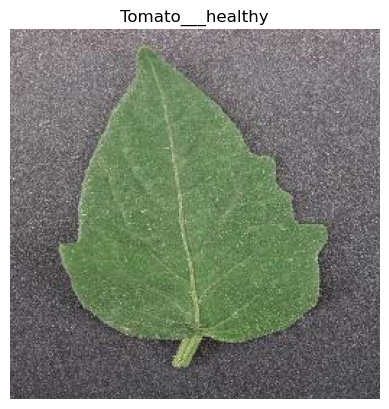

In [5]:
view_random_image(target_dir = "plantvillage dataset/color/", target_class = "Tomato___healthy")

In [6]:
# Splitting the dataset
import splitfolders as sf

sf.ratio("plantvillage dataset/color/", output = "output_plant_disease", seed = 1345, ratio = (0.8, 0.2))

Copying files: 54305 files [05:07, 176.66 files/s]


In [7]:
import tensorflow as tf
from tensorflow import keras

# Train dataset... 
train_ds = tf.keras.preprocessing.image_dataset_from_directory("./output_plant_disease/train/", 
                                                              seed = 123,
                                                              image_size = (224, 224),
                                                              batch_size = 64)
# Test dataset... 
test_ds = tf.keras.preprocessing.image_dataset_from_directory("./output_plant_disease/val/",
                                                             seed = 123,
                                                             image_size = (224, 224),
                                                             batch_size = 64)

Found 43429 files belonging to 38 classes.
Found 10876 files belonging to 38 classes.


In [17]:
from tensorflow import keras 
model = keras.models.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape = (224, 224, 3)),
    tf.keras.layers.Conv2D(filters = 16, kernel_size = (3, 3), padding = "same", activation = "relu", kernel_initializer = "he_normal"),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    
    tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), padding = "same", activation = "relu", kernel_initializer="he_normal"),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    
    tf.keras.layers.Dropout(0.20),
    
    tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), padding = "same", activation = "relu", kernel_initializer="he_normal"),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    
    tf.keras.layers.Dropout(0.20),
    
    tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), padding = "same", activation = "relu", kernel_initializer="he_normal"),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = "relu", kernel_initializer = "he_normal"),
    tf.keras.layers.Dense(64, "relu"),
    tf.keras.layers.Dense(38, activation = "softmax")  
])

model.compile(loss = "sparse_categorical_crossentropy",
             optimizer = "Adam",
             metrics = ['accuracy'])

In [18]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 112, 112, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 56, 56, 32)       0         
 g2D)                                                            
                                                                 
 dropout_9 (Dropout)         (None, 56, 56, 32)       

In [19]:
hist = model.fit(train_ds,
                epochs = 20,
                validation_data = test_ds,
                verbose = 1,
                batch_size = 64)

Epoch 1/20
679/679 [==============================] - 2526s 4s/step - loss: 1.3116 - accuracy: 0.6325 - val_loss: 0.6484 - val_accuracy: 0.8006
Epoch 2/20
679/679 [==============================] - 2570s 4s/step - loss: 0.4718 - accuracy: 0.8518 - val_loss: 0.3736 - val_accuracy: 0.8827
Epoch 3/20
679/679 [==============================] - 2594s 4s/step - loss: 0.3166 - accuracy: 0.9001 - val_loss: 0.2891 - val_accuracy: 0.9084
Epoch 4/20
679/679 [==============================] - 2768s 4s/step - loss: 0.2244 - accuracy: 0.9267 - val_loss: 0.2834 - val_accuracy: 0.9129
Epoch 5/20
679/679 [==============================] - 2127s 3s/step - loss: 0.1746 - accuracy: 0.9412 - val_loss: 0.2436 - val_accuracy: 0.9262
Epoch 6/20
679/679 [==============================] - 1625s 2s/step - loss: 0.1457 - accuracy: 0.9527 - val_loss: 0.1863 - val_accuracy: 0.9448
Epoch 7/20
679/679 [==============================] - 1726s 3s/step - loss: 0.1242 - accuracy: 0.9581 - val_loss: 0.2725 - val_accuracy:

In [20]:
model.evaluate(test_ds)

170/170 [==============================] - 87s 511ms/step - loss: 0.2198 - accuracy: 0.9446


[0.21982695162296295, 0.9445568323135376]

In [21]:
def plot_loss_curves(history, figsize):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))
    

  # Plot loss
  plt.figure(figsize = figsize)
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure(figsize = figsize)
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

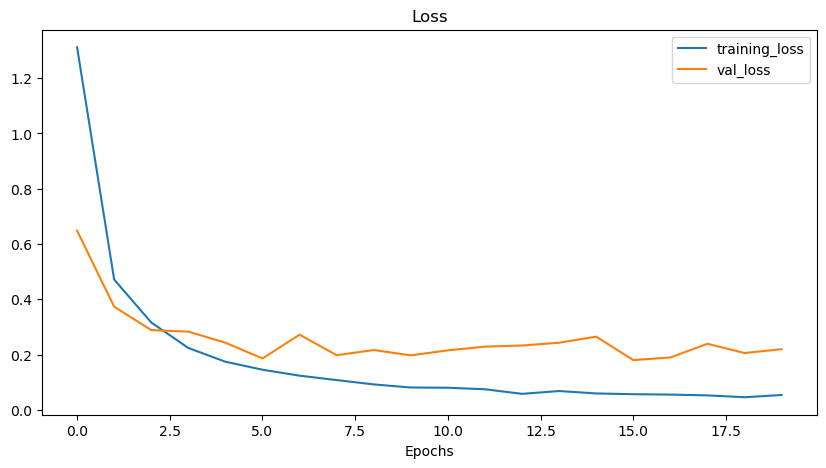

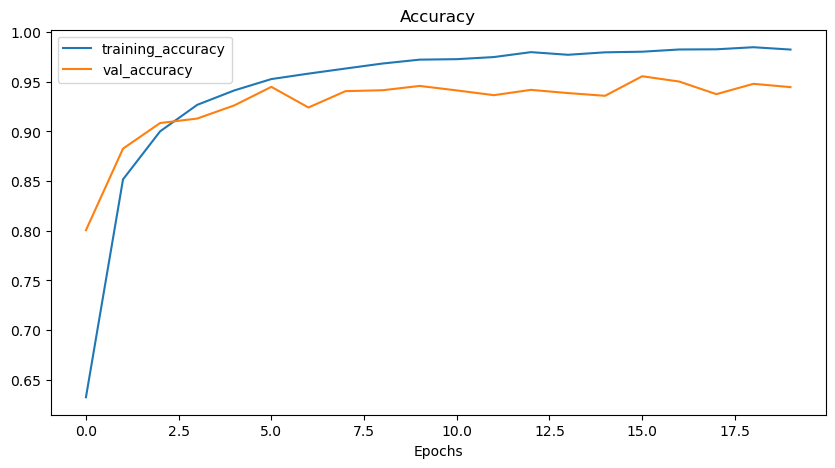

In [22]:
plot_loss_curves(hist, figsize = (10, 5))